### View #1 - Raw Data

I have two main datasets as well as some supplementary datasets I may or may not use. Show some QGIS screenshots here. 

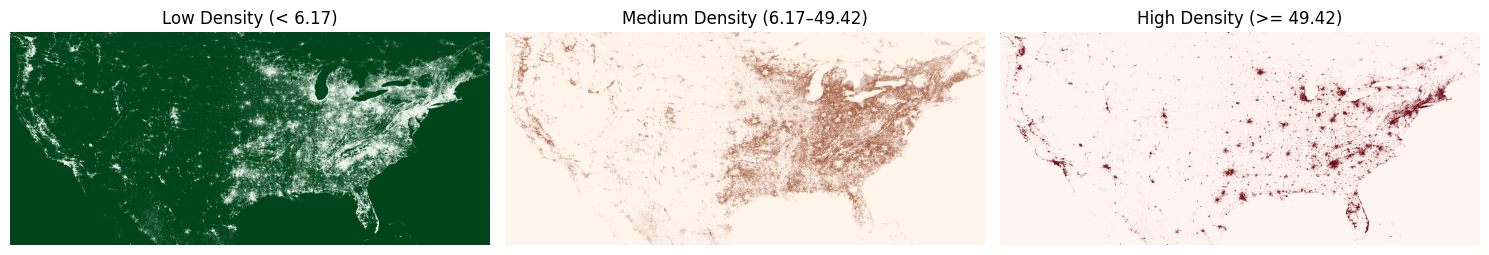

In [1]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from rasterio.windows import from_bounds

# -----------------------------------------------------------
# Path to GHSL population raster (WGS84, 30 arc-sec)
rpath = "../data/ghsl/GHS_POP_E2015_GLOBE_R2023A_4326_30ss_V1_0.tif"

# CONUS bounding box
conus_bounds = (-125.0, 24.0, -66.5, 50.0)

# -----------------------------------------------------------
# Load only the US region
with rasterio.open(rpath) as src:
    window = from_bounds(*conus_bounds, transform=src.transform)
    pop = src.read(1, window=window).astype(float)

# -----------------------------------------------------------
# Masks (your thresholds)
low_mask  = (pop < 6.17)
med_mask  = (pop >= 6.17) & (pop < 49.42)
high_mask = (pop >= 49.42)

# -----------------------------------------------------------
# Plot three masks
plt.figure(figsize=(15, 10))

plt.subplot(1, 3, 1)
plt.imshow(low_mask, cmap="Greens", origin="upper")
plt.title("Low Density (< 6.17)")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(med_mask, cmap="Oranges", origin="upper")
plt.title("Medium Density (6.17–49.42)")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(high_mask, cmap="Reds", origin="upper")
plt.title("High Density (>= 49.42)")
plt.axis("off")

plt.tight_layout()
plt.show()


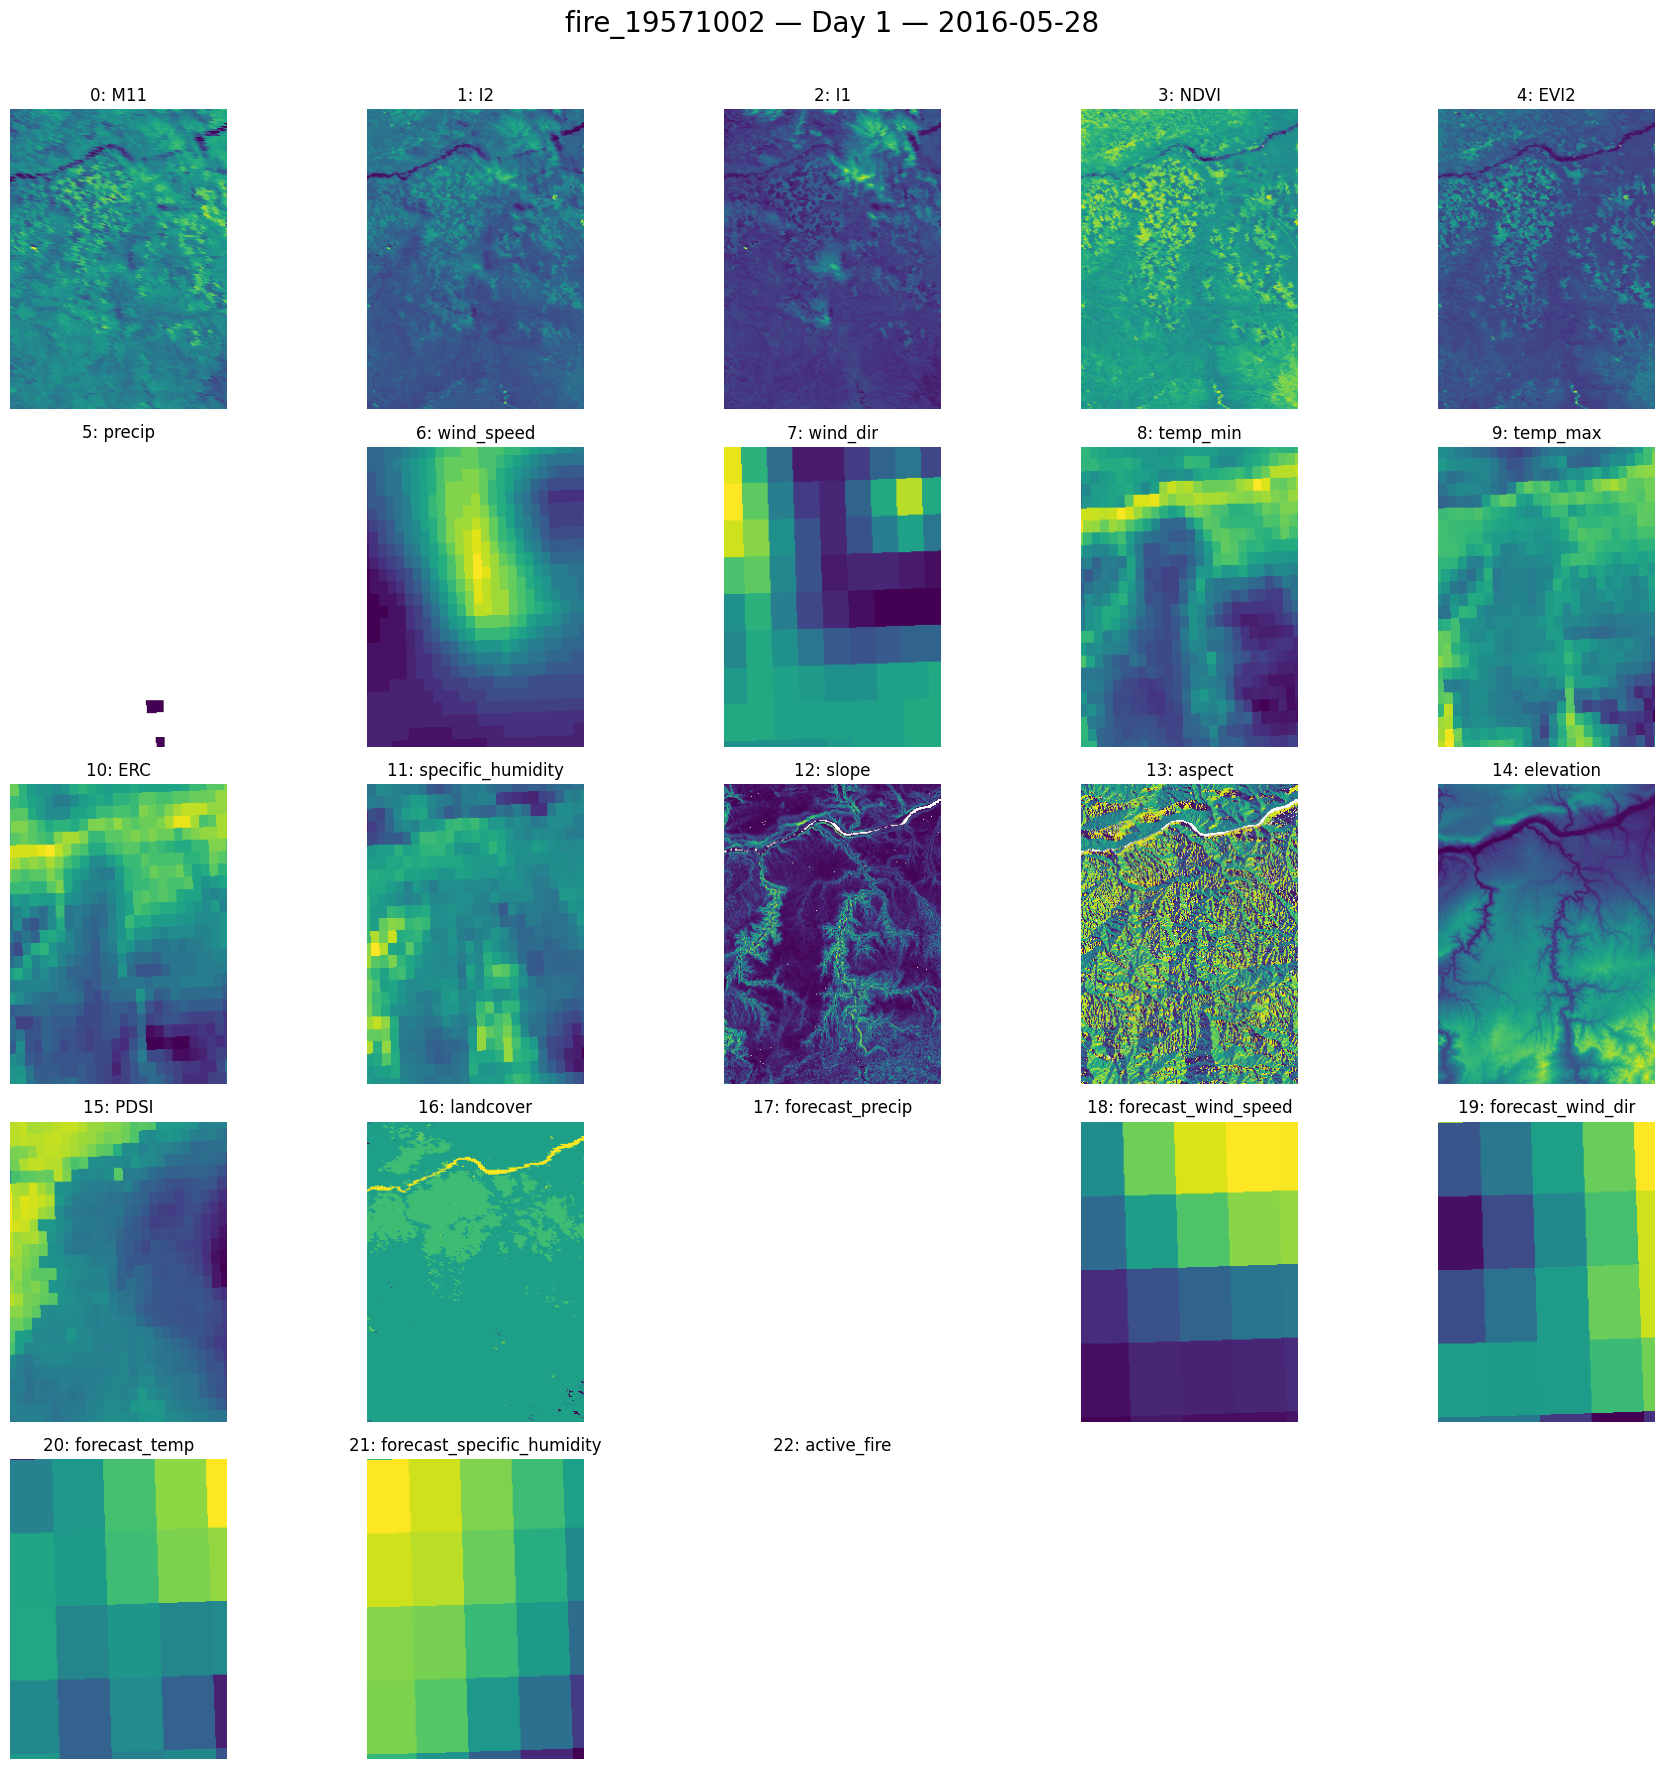

In [8]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

feature_names = [
    'M11', 'I2', 'I1', 'NDVI', 'EVI2',
    'precip', 'wind_speed', 'wind_dir',
    'temp_min', 'temp_max', 'ERC',
    'specific_humidity', 'slope', 'aspect',
    'elevation', 'PDSI', 'landcover',
    'forecast_precip', 'forecast_wind_speed',
    'forecast_wind_dir', 'forecast_temp',
    'forecast_specific_humidity',
    'active_fire'
]

path = "../data/fire_19571002.hdf5"

with h5py.File(path, "r") as f:
    data = f["data"]                       
    dates = f["data"].attrs["img_dates"]
    fire_id = f["data"].attrs["fire_name"]

    raster = data[0]                       # day 1 only
    num_bands = raster.shape[0]
    date = dates[0]

    cols = int(np.ceil(np.sqrt(num_bands)))
    rows = int(np.ceil(num_bands / cols))

    plt.figure(figsize=(18, 18))
    plt.suptitle(f"{fire_id} — Day 1 — {date}", fontsize=20)

    for b in range(num_bands):
        band = raster[b].astype(float)
        band = np.where(band == 0, np.nan, band)

        plt.subplot(rows, cols, b + 1)
        plt.imshow(band, cmap="viridis", origin="upper")
        plt.title(f"{b}: {feature_names[b]}")
        plt.axis("off")

    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()



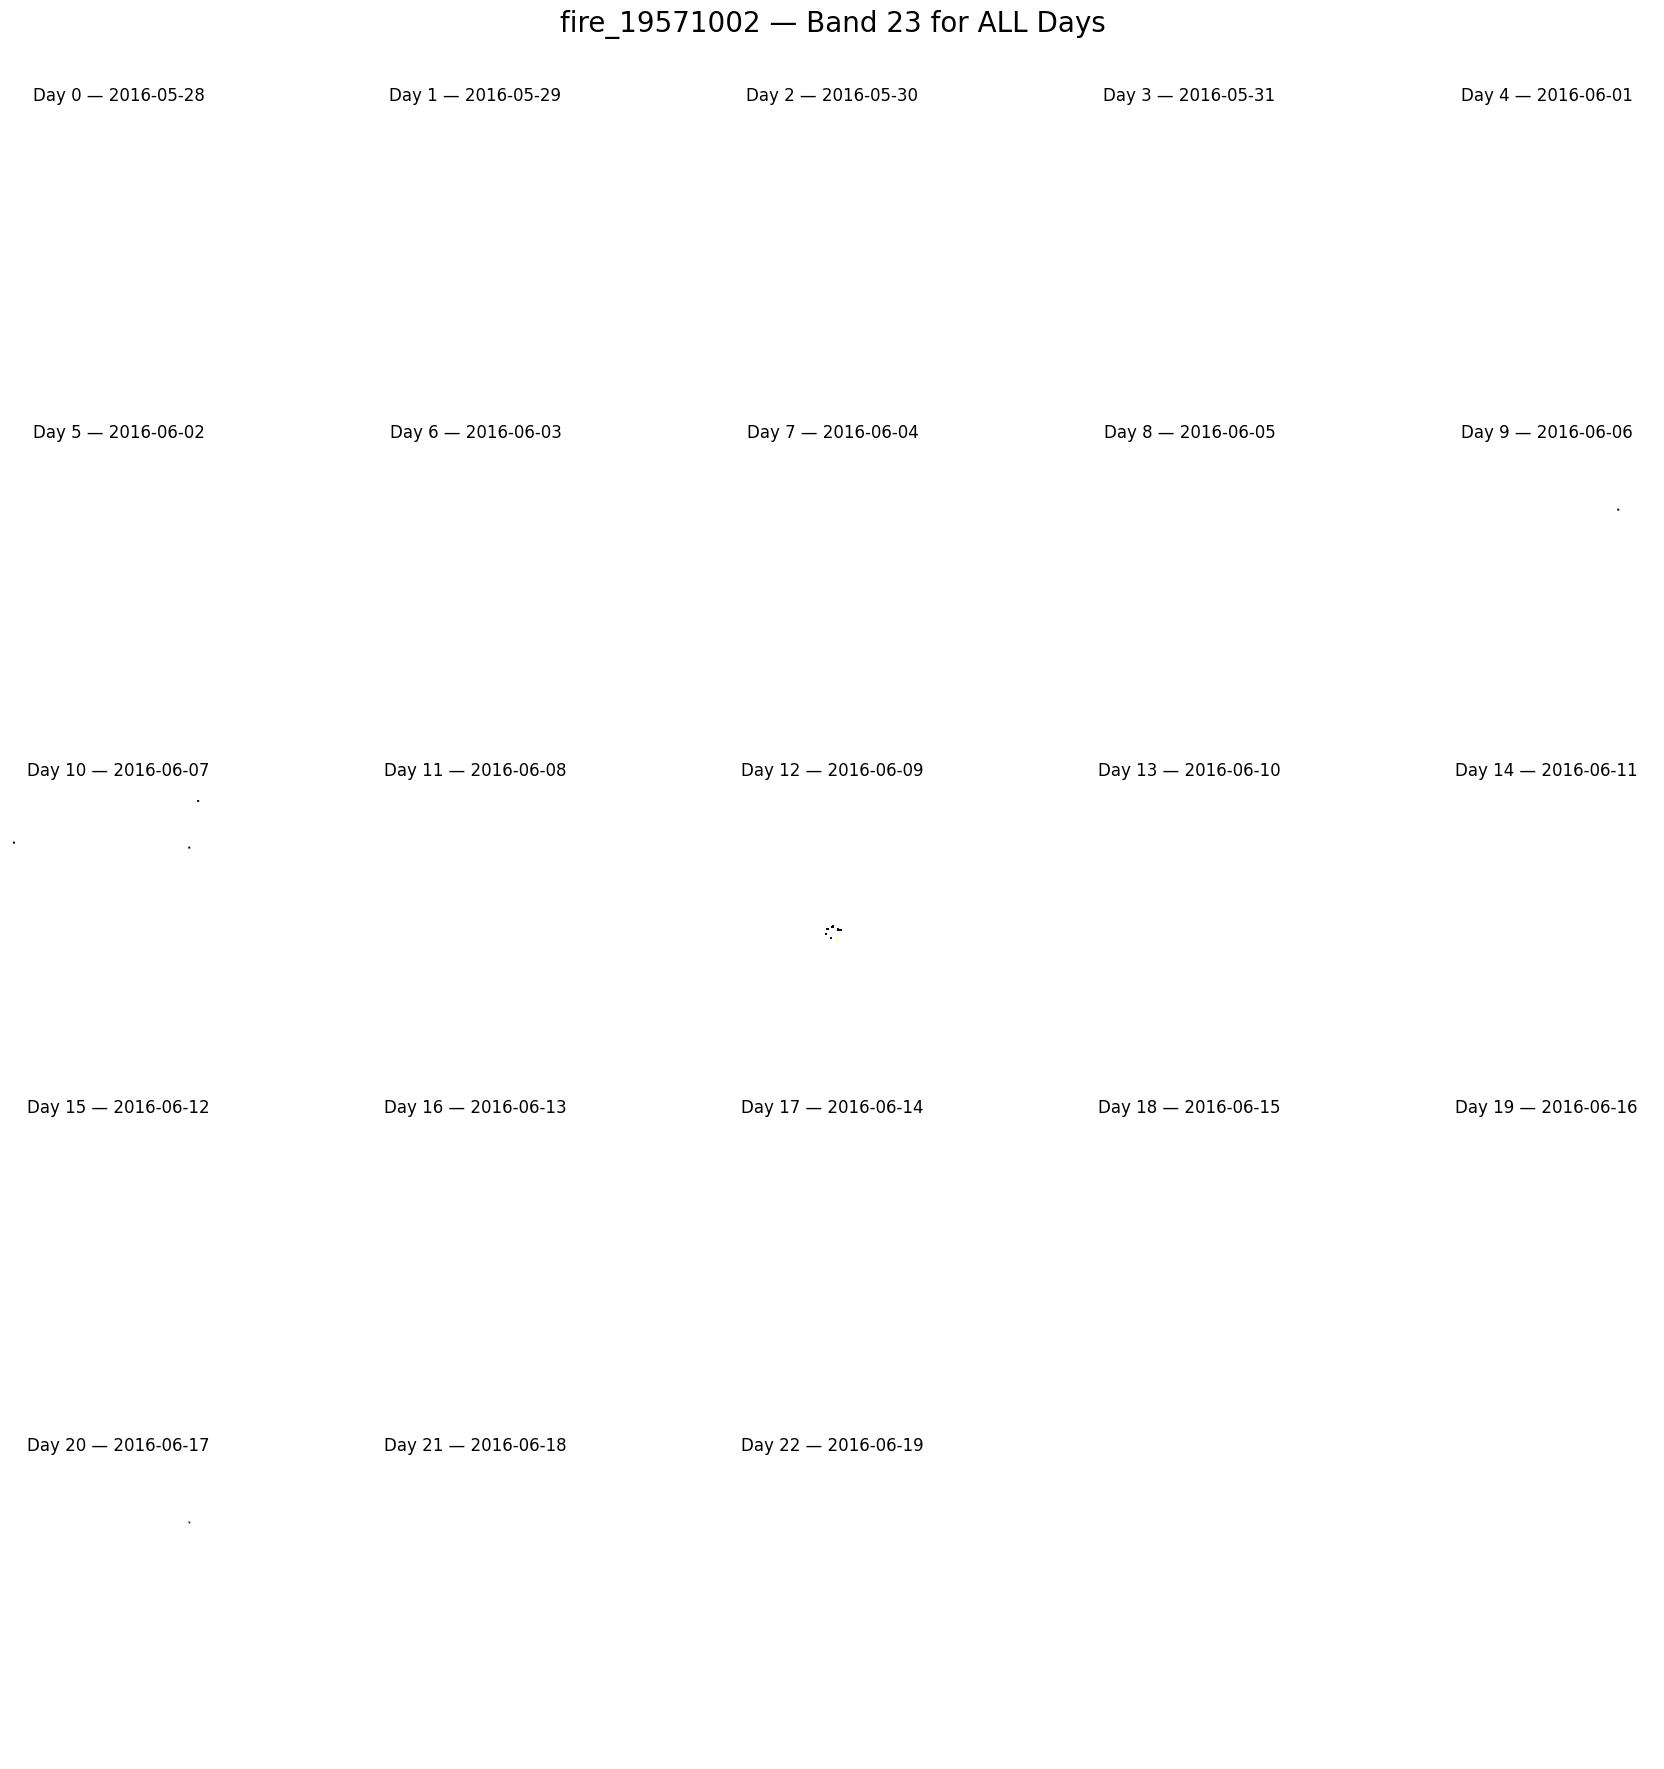

In [11]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

path = "../data/fire_19571002.hdf5"

with h5py.File(path, "r") as f:
    data = f["data"]                       # shape (days, bands, H, W)
    dates = f["data"].attrs["img_dates"]
    fire_id = f["data"].attrs["fire_name"]

    num_days = data.shape[0]
    band_index = 22                    # band 23

    cols = int(np.ceil(np.sqrt(num_days)))
    rows = int(np.ceil(num_days / cols))

    plt.figure(figsize=(18, 18))
    plt.suptitle(f"{fire_id} — Band 23 for ALL Days", fontsize=20)

    for d in range(num_days):
        arr = data[d, band_index].astype(float)
        arr = np.where(arr == 0, np.nan, arr)

        plt.subplot(rows, cols, d + 1)
        plt.imshow(arr, cmap="inferno", origin="upper")
        plt.title(f"Day {d} — {dates[d]}")
        plt.axis("off")

    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()
